# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de GridSearch con el fin de buscar los mejores hiperparámetros de distintos modelos dentro de un rango de valores definidos por nosotros mismos. Igualmente, se busca que usted aplique y comprenda los siguientes modelos:

- Árboles de decisión
- Bosques de decisión
- AdaBoost
- XGBoost
- Bagging

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. 

In [9]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

Lectura de CSV y borrado de filas incompletas.

In [10]:
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

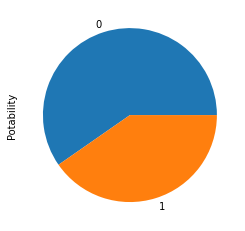

In [11]:
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

Utilizaremos la función `resample` de SciKit-Learn para remuestrear algunas muestras entre la clase '1'.

In [12]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

<AxesSubplot:ylabel='Potability'>

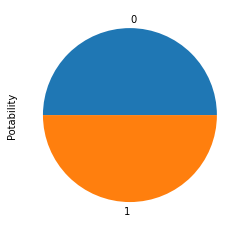

In [13]:
df['Potability'].value_counts().plot(kind='pie')

In [14]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

## Parte 1: Prueba de Modelos y GridSearch/RandomizedSearch

A continuación, realizaremos un procedimiento de búsqueda del mejor modelo y sus correspondientes hiperparámetros. Estos procedimientos se conocen como GridSearch/RandomizedSearch. Puede encontrar más información en los siguientes enlaces:

- [GridSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)
- [Medium Article: GridSearch & RandomizedSearch](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Partición de datos de prueba/entrenamiento.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# Utilice la función train_test_split #

## Parte 1A

### Definición de Parámetros de GridSearch/RandomizedSearch

Basado en la documentación de las funciones, defina los siguientes parámetros para los casos:

- GridSearch:
    - Árbol de Decisión (GridSearch):
        - 'criterion': 'gini' y 'entropy'
        - 'max_depth': vector de valores enteros entre 1 y 50
        - 'min_samples_leaf': 10 valores seleccionados por usted entre 1 y 100
    
    - Random Forest (GridSearch):
        - 'n_estimators': 4 valores seleccionados por usted entre 100 y 500
        - 'min_samples_leaf': 3 valores seleccionados por usted entre 2 y 30
        
    - AdaBoost (GridSearch):
        - 'n_estimators': 6 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
        
    - XGBoost (RandomizedSearch):
        - 'n_estimators': 8 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
    

In [18]:
# Búsqueda de Hiperparámetros

lr = LogisticRegression(random_state=42)

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

#Árbol de Decisión
criterion =  ['gini', 'entropy']
max_depth = list(range(1,51))
min_samples_leaf_dt = [1, 10, 25, 30, 40, 50, 60, 75, 90, 100]
para_dt = { 'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf_dt }
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)

#Random Forest
#n_estimators: número de árboles en el bosque.
n_estimators_rf = [100, 250, 400, 500]
min_samples_leaf_rf = [2, 17, 30]
params_rf = { 'n_estimators': n_estimators_rf, 'min_samples_leaf': min_samples_leaf_rf}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
n_estimators_ada = [50, 125, 250, 375, 500, 600]
learning_rate_ada = [0.01, 0.1, 0.3, 0.5, 0.8]
params_ada = { 'n_estimators':  n_estimators_ada, 'learning_rate': learning_rate_ada}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
n_estimators_xgb = [50, 125, 200, 275, 350, 425, 500, 600]
learning_rate_xgb = [0.01, 0.1, 0.3, 0.5, 0.8]
params_xgb = { 'n_estimators':  n_estimators_ada, 'learning_rate': learning_rate_ada}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

C:\Users\johna\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


### Búsqueda de Hiperparámetros

A continuación se debe realizar el proceso de GridSearch. Esta operación puede tardar.

In [19]:
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

C:\Users\johna\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\johna\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\johna\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\johna\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\johna\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\johna\anaconda3\lib\site-packages\xgboost\sklearn.p

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...e,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3, 0.5,
                                                          0.8],
                                        'n_estimators': [50, 125, 250, 375, 500,
                                                         600]})

In [20]:
print("Mejores parámetros Árbol de Decisión:", grid_dt.best_params_)
print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejores parámetros AdaBoost:", grid_ada.best_params_)
print("Mejores parámetros XGBoost:", rs_xgb.best_params_)

Mejores parámetros Árbol de Decisión: {'criterion': 'entropy', 'max_depth': 34, 'min_samples_leaf': 1}
Mejores parámetros Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Mejores parámetros AdaBoost: {'learning_rate': 0.8, 'n_estimators': 600}
Mejores parámetros XGBoost: {'n_estimators': 375, 'learning_rate': 0.1}


In [21]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 34, 'min_samples_leaf': 1}

## Parte 1B

### Boosting & Bagging

Para este caso utilice 100 clasificadores de Árbol de Decisión con los mejores parámetros obtenidos a partir del GridSearch realizado anteriormente.

In [25]:
# Boosting & Bagging
best_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=34, min_samples_leaf=1)
bagging = BaggingClassifier(base_estimator=best_dtc, n_estimators=100 )
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=34),
                  n_estimators=100)

### Métricas de Evaluación

A continuación podrá observar un resumen con las precisiones de cada modelo y posteriormente su representación gráfica.

In [26]:
classifiers = [('Regresión Logística', lr),
               ('Árbol de Decisión', dt), ('Random Forest', rf), ('AdaBoost', ada),
               ('Bagging', bagging), ('XGBoost', xgb)]

In [27]:
from sklearn.metrics import accuracy_score

classifier_names = []
classifier_acc = []
for classifier_name, classifier in classifiers:
 
    # Ajuste para datos de entrenamiento
    classifier.fit(X_train, y_train)    

    # Predicciones
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    # Evaluación del clasificador
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    classifier_names.append(classifier_name)
    classifier_acc.append(accuracy)

Regresión Logística : 0.49
Árbol de Decisión : 0.74
Random Forest : 0.83
AdaBoost : 0.61
Bagging : 0.80
XGBoost : 0.78


# Resultados Preliminares

<BarContainer object of 6 artists>

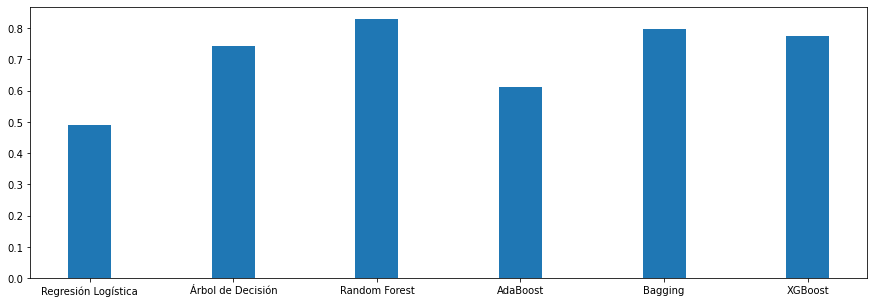

In [28]:
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_acc, width=0.3)

## Parte 2

### Análisis de Resultados

Ahora usted utilizará la función `classication_report` para determinar qué clasificador se ajusta más a los resultados buscados, teniendo en cuenta el contexto del problema y la simplicidad de cada modelo.

### Random Forest

In [29]:
from sklearn.metrics import classification_report

y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       364
           1       0.83      0.83      0.83       356

    accuracy                           0.83       720
   macro avg       0.83      0.83      0.83       720
weighted avg       0.83      0.83      0.83       720



### Árbol de Decisión

In [30]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       364
           1       0.71      0.82      0.76       356

    accuracy                           0.74       720
   macro avg       0.75      0.74      0.74       720
weighted avg       0.75      0.74      0.74       720



### XGBoost

In [31]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       364
           1       0.75      0.81      0.78       356

    accuracy                           0.78       720
   macro avg       0.78      0.78      0.77       720
weighted avg       0.78      0.78      0.77       720



### Bagging de Árboles de Decisión

In [32]:
y_pred_bagging = bagging.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       364
           1       0.78      0.82      0.80       356

    accuracy                           0.80       720
   macro avg       0.80      0.80      0.80       720
weighted avg       0.80      0.80      0.80       720



## Conclusiones

Concluya a partir de los resultados obtenidos y la documentación leída sobre los métodos utilizados y las diferencias entre sus distintos rendimientos.